<a href="https://colab.research.google.com/github/trishika22/final_year_project/blob/main/Group_6_Code_(Sentiment_Analysis_using_Deep_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.python.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU, Flatten, Conv1D, MaxPooling1D, Dropout, BatchNormalization,GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import time
import datetime
import seaborn as sns
from tensorflow.keras.optimizers import Adam

# **Loading Data**

In [ ]:
from google.colab import files

data = files.upload()
data1 = files.upload()

Saving srinjoy_textblob.csv to srinjoy_textblob.csv


Saving model_attention.pkl to model_attention (1).pkl
Saving model_cnn.pkl to model_cnn.pkl
Saving model_gru.pkl to model_gru.pkl
Saving model_lstm.pkl to model_lstm.pkl


In [ ]:
import io
df = pd.read_csv(io.BytesIO(data['textblob.csv']))
df['og_text']=df['text']
df['text'] = df['text'].astype(str)
df['text'] = df['text'].str.replace('\d+', '')
df['text'] = df['text'].str.replace('[+-]?[0-9]+\.[0-9]+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app


In [ ]:
df.head(10)

,text,sentiment,date,polarity,og_text
0,nifty next amazing set of stock which can eve...,Positive,01-01-2021 05:11,0.366667,nifty next 50 amazing set of stock which can e...
1,USER decodingmumbai happynewyear happynewyear ...,Positive,01-01-2021 05:10,0.000000,USER decodingmumbai happynewyear2021 happynewy...
2,USER guess range contestalert nifty contest ...,Positive,01-01-2021 04:38,0.000000,USER guess 7890 8440 range contestalert nifty5...
3,USER cool after the nifty the is my favouri...,Positive,01-01-2021 03:29,0.425000,USER cool after the nifty 50 the 10 18 is my f...
4,new year nifty strategy very low risk assuring...,Positive,01-01-2021 02:13,0.045455,new year nifty strategy very low risk assuring...
5,unhidden future wealth creator itc usl bse dcb...,Positive,01-01-2021 01:59,0.000000,unhidden future wealth creator itc usl bse dcb...
6,may the stock market rally continue in nifty,Positive,01-01-2021 00:53,0.000000,may the stock market rally continue in 2021 ni...
7,tech view nifty face selling at show sign fa...,Positive,01-01-2021 00:50,0.000000,tech view nifty50 face selling at 14 00 show s...
8,happy new year to all from USER team happynewy...,Positive,01-01-2021 00:30,0.468182,happy new year to all from USER team happynewy...
9,banknifty daily myview negativedivergence nift...,Positive,01-01-2021 00:26,0.000000,banknifty daily myview negativedivergence nift...


In [ ]:
def cal(x):
  if x == 0:
    return 0
  elif x > 0:
    return 1
  else:
    return -1
df['sentiment'] = [cal(x) for x in df['polarity']]

In [ ]:
df['sentiment'].value_counts()

 0    71710
 1    50161
-1    18501
Name: sentiment, dtype: int64

In [ ]:
df = df.sample(df.shape[0])

# **Visualizing the data**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

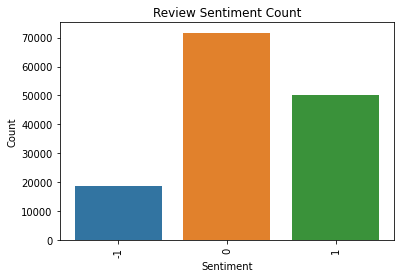

In [ ]:
col = "sentiment"
xlabel = "Sentiment"
ylabel = "Count"
sns.countplot(df[col])
plt.title("Review Sentiment Count")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=90)
plt.plot()

# **Preparing Data**

In [ ]:
X=df['text'] #df['post_content']
Y=df['sentiment']
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
Y = to_categorical(Y)
Y

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.15)
max_words = len(set(" ".join(i for i in X_train).split()))
max_len = X_train.apply(lambda x : len(str(x))).max()
max_len,max_words

(440, 39142)

In [ ]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_seq = sequence.pad_sequences(X_train_seq, maxlen=max_len)

# **LSTM**

In [ ]:
def get_LSTM_model(num_class=2):
  model = Sequential()
  model.add(Embedding(max_words, 100, input_length=max_len))
  model.add(LSTM(256))

  model.add(Dropout(0.5))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Dense(512, activation='relu'))

  model.add(Dropout(0.5))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  if num_class>2:
        model.add(Dense(num_class, activation='softmax'))
  else:
        model.add(Dense(1, activation='sigmoid'))

  model.summary()

  return model

In [ ]:
num_class = 3
model1 = get_LSTM_model(num_class=num_class)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 411, 100)          3899400   
                                                                 
 lstm (LSTM)                 (None, 256)               365568    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 512)               131584    
                                                        

In [ ]:
model1.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 411, 100)          3899400   
                                                                 
 lstm (LSTM)                 (None, 256)               365568    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 512)               131584    
                                                        

In [ ]:
verbose = 1
epochs = 5
batch_size = 128
validation_split = 0.2


print("Starting...\n")
start_time = time.time()

print("Trainning Model ...\n")
history1 = model1.fit(
    X_train_seq,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    validation_split=validation_split
    )

elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print("\nElapsed Time: " + elapsed_time)
print("Completed Model Trainning")

Starting...

Trainning Model ...

Epoch 1/5
746/746 [==============================] - 132s 168ms/step - loss: 0.4763 - accuracy: 0.8238 - val_loss: 0.1431 - val_accuracy: 0.9594
Epoch 2/5
746/746 [==============================] - 126s 169ms/step - loss: 0.1110 - accuracy: 0.9691 - val_loss: 0.0931 - val_accuracy: 0.9733
Epoch 3/5
746/746 [==============================] - 126s 168ms/step - loss: 0.0711 - accuracy: 0.9813 - val_loss: 0.1031 - val_accuracy: 0.9706
Epoch 4/5
746/746 [==============================] - 125s 168ms/step - loss: 0.0560 - accuracy: 0.9853 - val_loss: 0.0913 - val_accuracy: 0.9761
Epoch 5/5
746/746 [==============================] - 125s 168ms/step - loss: 0.0415 - accuracy: 0.9886 - val_loss: 0.1069 - val_accuracy: 0.9738

Elapsed Time: 00:11:25
Completed Model Trainning


In [ ]:
test_X_seq = tokenizer.texts_to_sequences(X_test)
test_X_seq = sequence.pad_sequences(test_X_seq, maxlen=max_len)
print('Testing...')
score, acc = model1.evaluate(test_X_seq, y_test, batch_size=128)

print('Test score:', score)
print('Test accuracy:', acc)

print("Accuracy of LSTM Model: {0:.2%}".format(acc))

Testing...
165/165 [==============================] - 9s 53ms/step - loss: 0.1048 - accuracy: 0.9746
Test score: 0.10475167632102966
Test accuracy: 0.9746390581130981
Accuracy of LSTM Model: 97.46%


# **CNN**

In [ ]:
def get_CNN_model(num_class=2):
    model = Sequential()

    model.add(Embedding(max_words, 100, input_length=max_len))

    model.add(Conv1D(1024, 3, padding='valid', activation='relu', strides=1))
    model.add(GlobalMaxPooling1D())


    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(2048, activation='relu'))

    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    if num_class>2:
        model.add(Dense(num_class, activation='softmax'))
    else:
        model.add(Dense(1, activation='sigmoid'))

    model.summary()
    return model

In [ ]:
num_class = 3
model2 = get_CNN_model(num_class=num_class)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 411, 100)          3899400   
                                                                 
 conv1d (Conv1D)             (None, 409, 1024)         308224    
                                                                 
 global_max_pooling1d (Globa  (None, 1024)             0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 batch_normalization_2 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 1024)             

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 411, 100)          3899400   
                                                                 
 conv1d (Conv1D)             (None, 409, 1024)         308224    
                                                                 
 global_max_pooling1d (Globa  (None, 1024)             0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 batch_normalization_2 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 1024)             

In [ ]:
verbose = 1
epochs = 5
batch_size = 128
validation_split = 0.2


print("Starting...\n")
start_time = time.time()

print("Trainning Model ...\n")
history2 = model2.fit(
    X_train_seq,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    validation_split=validation_split
    )

elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print("\nElapsed Time: " + elapsed_time)
print("Completed Model Trainning")

Starting...

Trainning Model ...

Epoch 1/5
746/746 [==============================] - 102s 127ms/step - loss: 0.3847 - accuracy: 0.8797 - val_loss: 0.0949 - val_accuracy: 0.9707
Epoch 2/5
746/746 [==============================] - 94s 126ms/step - loss: 0.0921 - accuracy: 0.9721 - val_loss: 0.0754 - val_accuracy: 0.9746
Epoch 3/5
746/746 [==============================] - 94s 126ms/step - loss: 0.0671 - accuracy: 0.9783 - val_loss: 0.0707 - val_accuracy: 0.9779
Epoch 4/5
746/746 [==============================] - 94s 126ms/step - loss: 0.0548 - accuracy: 0.9825 - val_loss: 0.0695 - val_accuracy: 0.9798
Epoch 5/5
746/746 [==============================] - 94s 126ms/step - loss: 0.0478 - accuracy: 0.9842 - val_loss: 0.0790 - val_accuracy: 0.9801

Elapsed Time: 00:08:23
Completed Model Trainning


In [ ]:
test_X_seq = tokenizer.texts_to_sequences(X_test)
test_X_seq = sequence.pad_sequences(test_X_seq, maxlen=max_len)
print('Testing...')
score, acc = model2.evaluate(test_X_seq, y_test, batch_size=128)

print('Test score:', score)
print('Test accuracy:', acc)

print("Accuracy of CNN Model: {0:.2%}".format(acc))

Testing...
165/165 [==============================] - 6s 35ms/step - loss: 0.0806 - accuracy: 0.9795
Test score: 0.08056744933128357
Test accuracy: 0.9794833064079285
Accuracy of CNN Model: 97.95%


# **GRU**

In [ ]:
def get_GRU_model(num_class=2):
  model = Sequential()
  model.add(Embedding(max_words, 100, input_length=max_len))
  model.add(GRU(256))

  model.add(Dropout(0.5))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Dense(512, activation='relu'))

  model.add(Dropout(0.5))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  if num_class>2:
        model.add(Dense(num_class, activation='softmax'))
  else:
        model.add(Dense(1, activation='sigmoid'))

  model.summary()

  return model

In [ ]:
num_class = 3
model3 = get_GRU_model(num_class=num_class)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 411, 100)          3899400   
                                                                 
 gru (GRU)                   (None, 256)               274944    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               131584    
                                                      

In [ ]:
model3.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 411, 100)          3899400   
                                                                 
 gru (GRU)                   (None, 256)               274944    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               131584    
                                                      

In [ ]:
verbose = 1
epochs = 5
batch_size = 128
validation_split = 0.2


print("Starting...\n")
start_time = time.time()

print("Trainning Model ...\n")
history3 = model3.fit(
    X_train_seq,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    validation_split=validation_split
    )

elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print("\nElapsed Time: " + elapsed_time)
print("Completed Model Trainning")

Starting...

Trainning Model ...

Epoch 1/5
746/746 [==============================] - 113s 148ms/step - loss: 0.5072 - accuracy: 0.8131 - val_loss: 0.1995 - val_accuracy: 0.9319
Epoch 2/5
746/746 [==============================] - 109s 146ms/step - loss: 0.1576 - accuracy: 0.9531 - val_loss: 0.1236 - val_accuracy: 0.9632
Epoch 3/5
746/746 [==============================] - 109s 146ms/step - loss: 0.0837 - accuracy: 0.9764 - val_loss: 0.0863 - val_accuracy: 0.9755
Epoch 4/5
746/746 [==============================] - 109s 146ms/step - loss: 0.0564 - accuracy: 0.9847 - val_loss: 0.0938 - val_accuracy: 0.9723
Epoch 5/5
746/746 [==============================] - 110s 147ms/step - loss: 0.0411 - accuracy: 0.9885 - val_loss: 0.0882 - val_accuracy: 0.9788

Elapsed Time: 00:09:24
Completed Model Trainning


In [ ]:
test_X_seq = tokenizer.texts_to_sequences(X_test)
test_X_seq = sequence.pad_sequences(test_X_seq, maxlen=max_len)
print('Testing...')
score, acc = model3.evaluate(test_X_seq, y_test, batch_size=128)

print('Test score:', score)
print('Test accuracy:', acc)

print("Accuracy of GRU Model: {0:.2%}".format(acc))

Testing...
165/165 [==============================] - 7s 44ms/step - loss: 0.0906 - accuracy: 0.9788
Test score: 0.09061134606599808
Test accuracy: 0.978818416595459
Accuracy of GRU Model: 97.88%


# **Attention LSTM**

In [ ]:
 import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Embedding, Input, Layer
from tensorflow.keras.models import Model


def load_model(model_path):
    return tf.keras.models.load_model(model_path)


def get_model(model_type, *args, **kwargs):
    if model_type == "lstm":
        return _lstm_based_model(*args, **kwargs)
    if model_type == "attention":
        return _attention_based_model(*args, **kwargs)
    raise NotImplementedError


def _lstm_based_model(maxlen, vocab_size, emb_size, hidden_size=32, mask_zero=True):
    inp = Input(shape=[maxlen])
    emb = Embedding(vocab_size, emb_size, mask_zero=mask_zero,)
    x = emb(inp)
    x = LSTM(hidden_size)(x)
    out = Dense(1, activation="sigmoid")(x)
    model = Model(inputs=inp, outputs=out)
    return model


def _attention_based_model(
    maxlen,
    vocab_size,
    emb_size,
    hidden_size=32,
    attention_hs=16,
    mask_zero=True,
    return_attn_weights=False,
):
    inp = Input(shape=[maxlen])
    emb = Embedding(vocab_size, emb_size, mask_zero=mask_zero,)
    x = emb(inp)
    x, hs, cs = LSTM(hidden_size, return_sequences=True, return_state=True)(x)
    x, weights = BahdanauAttention(attention_hs)(hs, x)
    out = Dense(3, activation="sigmoid")(x)
    model = Model(inputs=inp, outputs=out)
    if return_attn_weights:
        model_attention = Model(inputs=inp, outputs=weights)
        return model, model_attention
    return model


class BahdanauAttention(Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    # TODO: Add masking
    def call(self, query, values):
        # query : [batch_size, hidden_size]
        # values: [batch_size, maxlen, hidden_size]

        # (batch_size, 1, hidden_size)
        hidden_with_time_axis = tf.expand_dims(query, 1)

        # (batch_size, maxlen, units) + (batch_size, 1, units) = (batch_size, maxlen, units)
        score = self.W1(values) + self.W2(hidden_with_time_axis)

        # (batch_size, maxlen, 1)
        score = self.V(tf.nn.tanh(score))

        # attention_weights shape == (batch_size, maxlen, 1)
        attention_weights = tf.nn.softmax(score, axis=1)

        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights


In [ ]:
verbose = 1
epochs = 5
emb_size = 32
batch_size = 128
validation_split = 0.2

model, model_attention = get_model(
    "attention",
    max_len,
    max_words,
    emb_size,
    attention_hs=16,
    return_attn_weights=True,
)
model.summary(line_length=200)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "model"
________________________________________________________________________________________________________________________________________________________________________________________________________
 Layer (type)                                                     Output Shape                                Param #                 Connected to                                                      
 input_1 (InputLayer)                                             [(None, 411)]                               0                       []                                                                
                                                                                                                                                                                                        
 embedding_3 (Embedding)                                          (None, 411, 32)                             1247808                 ['input_1[0][0]']                              

In [ ]:
print("Starting...\n")
start_time = time.time()

print("Trainning Model ...\n")
model.fit(
    X_train_seq,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    validation_split=validation_split
)

elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print("\nElapsed Time: " + elapsed_time)
print("Completed Model Trainning")

Starting...

Trainning Model ...

Epoch 1/5
746/746 [==============================] - 950s 1s/step - loss: 0.2915 - accuracy: 0.8098 - val_loss: 0.1152 - val_accuracy: 0.9432
Epoch 2/5
746/746 [==============================] - 946s 1s/step - loss: 0.0730 - accuracy: 0.9654 - val_loss: 0.0681 - val_accuracy: 0.9673
Epoch 3/5
746/746 [==============================] - 947s 1s/step - loss: 0.0455 - accuracy: 0.9793 - val_loss: 0.0603 - val_accuracy: 0.9719
Epoch 4/5
746/746 [==============================] - 946s 1s/step - loss: 0.0330 - accuracy: 0.9854 - val_loss: 0.0592 - val_accuracy: 0.9731
Epoch 5/5
746/746 [==============================] - 953s 1s/step - loss: 0.0262 - accuracy: 0.9892 - val_loss: 0.0603 - val_accuracy: 0.9748

Elapsed Time: 01:19:26
Completed Model Trainning


In [ ]:

test_X_seq = tokenizer.texts_to_sequences(X_test)
test_X_seq = sequence.pad_sequences(test_X_seq, maxlen=max_len)
print('Testing...')
score, acc = model.evaluate(test_X_seq, y_test, batch_size=128)

print('Test score:', score)
print('Test accuracy:', acc)

print("Accuracy of Attention LSTM Model: {0:.2%}".format(acc))

Testing...
165/165 [==============================] - 15s 91ms/step - loss: 0.0612 - accuracy: 0.9747
Test score: 0.0611986480653286
Test accuracy: 0.9747340679168701
Accuracy of Attention LSTM Model: 97.47%


In [ ]:
import pickle

pickle.dump(model1, open('model_lstm.pkl', 'wb'))

pickle.dump(model2, open('model_cnn.pkl', 'wb'))

pickle.dump(model3, open('model_gru.pkl', 'wb'))

pickle.dump(model, open('model_attention.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://d31f6522-e911-4cb4-91a5-64f9eb73a88f/assets


INFO:tensorflow:Assets written to: ram://d31f6522-e911-4cb4-91a5-64f9eb73a88f/assets


INFO:tensorflow:Assets written to: ram://3e22d68b-db03-496b-8e9e-88285b7dce54/assets


INFO:tensorflow:Assets written to: ram://3e22d68b-db03-496b-8e9e-88285b7dce54/assets


INFO:tensorflow:Assets written to: ram://a78583bf-1adc-4d8a-ba64-61a902592275/assets


INFO:tensorflow:Assets written to: ram://a78583bf-1adc-4d8a-ba64-61a902592275/assets


INFO:tensorflow:Assets written to: ram://fa4b50b5-b096-4305-b8cf-f98c380eccb7/assets


INFO:tensorflow:Assets written to: ram://fa4b50b5-b096-4305-b8cf-f98c380eccb7/assets


In [ ]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
lstm_pipeline = joblib.load('model_lstm.pkl')
print("lstm [loss,acc] - ",lstm_pipeline.evaluate(test_X_seq, y_test, batch_size=128))
cnn_pipeline = joblib.load('model_cnn.pkl')
print("cnn [loss,acc] - ",cnn_pipeline.evaluate(test_X_seq, y_test, batch_size=128))
gru_pipeline = joblib.load('model_gru.pkl')
print("gru [loss,acc] - ",gru_pipeline.evaluate(test_X_seq, y_test, batch_size=128))
attention_pipeline = joblib.load('model_attention.pkl')
print("attention [loss,acc] - ",attention_pipeline.evaluate(test_X_seq, y_test, batch_size=128))

ValueError: ignored

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
def simple_stacking(models,data):
    pred_total = 0
    for model in models:
        proba_model = model.predict(data)
        pred_total += proba_model #pred_model
    pred_final = (pred_total/len(models))
    a=pred_final
    pred_final=(a == a.max(axis=1)[:,None]).astype('float32')
    return pred_final
#Ensemble without Attention LSTM
models = [lstm_pipeline, cnn_pipeline, gru_pipeline]
#Ensemble with Attention LSTM
models2 = [lstm_pipeline, cnn_pipeline, gru_pipeline, attention_pipeline]
pred_final = simple_stacking(models,test_X_seq)
pred_final2 = simple_stacking(models2,test_X_seq)
print("w/o attn: ",accuracy_score(pred_final, y_test))
print("w attn: ",accuracy_score(pred_final2, y_test))

w/o attn:  0.9835201367781155
w attn:  0.9836626139817629


In [ ]:
X_seq = tokenizer.texts_to_sequences(X)
X_seq = sequence.pad_sequences(X_seq, maxlen=max_len)
lstm_vals = lstm_pipeline.predict(X_seq,batch_size=128)
a=lstm_vals
lstm_vals=(a == a.max(axis=1)[:,None]).astype('float32')
cnn_vals = cnn_pipeline.predict(X_seq,batch_size=128)
a=cnn_vals
cnn_vals=(a == a.max(axis=1)[:,None]).astype('float32')
gru_vals = gru_pipeline.predict(X_seq,batch_size=128)
a=gru_vals
gru_vals=(a == a.max(axis=1)[:,None]).astype('float32')
attlstm_vals = attention_pipeline.predict(X_seq,batch_size=128)
a=attlstm_vals
attlstm_vals=(a == a.max(axis=1)[:,None]).astype('float32')
ensb1_vals = simple_stacking(models,X_seq)
ensb2_vals =  simple_stacking(models2,X_seq)


ValueError: ignored

In [ ]:
def get_val(L):
  l=[]
  for i in L:
    if i[0]==1:
      l.append("-1")
    elif i[1]==1:
      l.append("0")
    elif i[2]==1:
      l.append("1")
  return l

In [ ]:
dfd = pd.DataFrame()
dfd['text'] = df['og_text']
dfd['date']=df['date']
dfd['Actual-textblob'] = get_val(Y)
dfd['LSTM']=get_val(lstm_vals)
dfd['CNN']=get_val(cnn_vals)
dfd['GRU']=get_val(gru_vals)
dfd['Att LSTM']=get_val(attlstm_vals)
dfd['Ensemble_wo_Attn']=get_val(ensb1_vals)
dfd['Ensemble_w_Attn']=get_val(ensb2_vals)
dfd.to_excel("textblob_result.xlsx")

In [ ]:
dfd.head(10)

,text,date,Actual-textblob,LSTM,CNN,GRU,Att LSTM,Ensemble_wo_Attn,Ensemble_w_Attn
131396,buy on dip till 11606 with stop loss of 20 poi...,27-02-2020 09:24,0,0,0,0,0,0,0
91181,market stat a of now banknifty nifty niftyfift...,09-06-2020 09:49,0,0,0,0,0,0,0
29892,amp bse sensex nse nifty 50 likely to open low...,21-10-2020 04:31,0,0,0,0,0,0,0
6831,USER mukesh ambani promoted reliance jio which...,16-12-2020 19:41,0,0,0,0,0,0,0
93174,high and extreme volume is not retail money un...,04-06-2020 15:42,1,1,1,1,1,1,1
86707,kscl sell 605 610 sl USER target 590 581 jackp...,17-06-2020 10:01,0,0,0,0,0,0,0
137560,india share lower at close of trade nifty 50 d...,27-01-2020 16:25,-1,-1,-1,-1,-1,-1,-1
24504,sunpharma trying to come out of wood finding s...,03-11-2020 10:49,0,0,0,0,0,0,0
75220,bank nifty market analysis for 10th july 2020 ...,09-07-2020 17:28,0,0,0,0,0,0,0
69467,USER USER USER USER USER USER USER USER USER U...,21-07-2020 22:21,0,0,0,0,0,0,0


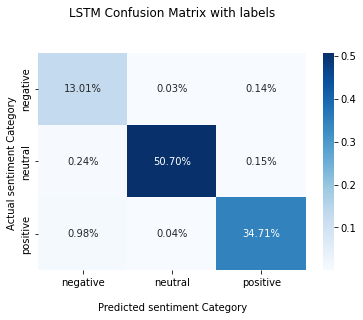

In [ ]:
#lstm
cf_matrix1 = confusion_matrix(np.asarray(Y).argmax(axis=1), np.asarray(lstm_vals).argmax(axis=1))
ax1 = sns.heatmap(cf_matrix1/np.sum(cf_matrix1), annot=True,
            fmt='.2%', cmap='Blues')
ax1.set_title('LSTM Confusion Matrix with labels\n\n');
ax1.set_xlabel('\nPredicted sentiment Category')
ax1.set_ylabel('Actual sentiment Category ');
ax1.xaxis.set_ticklabels(['negative','neutral', 'positive'])
ax1.yaxis.set_ticklabels(['negative','neutral', 'positive'])
plt.show()

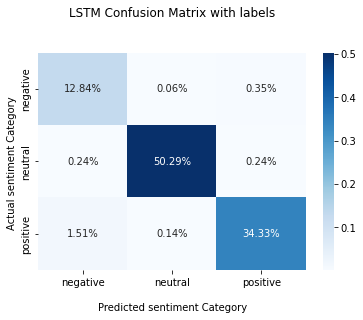

In [ ]:
#lstm_test
cf_matrix1 = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(lstm_val_t).argmax(axis=1))
ax1 = sns.heatmap(cf_matrix1/np.sum(cf_matrix1), annot=True,
            fmt='.2%', cmap='Blues')
ax1.set_title('LSTM Confusion Matrix with labels\n\n');
ax1.set_xlabel('\nPredicted sentiment Category')
ax1.set_ylabel('Actual sentiment Category ');
ax1.xaxis.set_ticklabels(['negative','neutral', 'positive'])
ax1.yaxis.set_ticklabels(['negative','neutral', 'positive'])
plt.show()

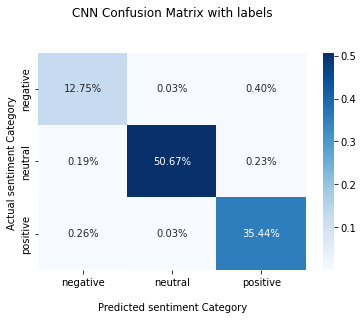

In [ ]:
#cnn
cf_matrix2 = confusion_matrix(np.asarray(Y).argmax(axis=1), np.asarray(cnn_vals).argmax(axis=1))
ax2 = sns.heatmap(cf_matrix2/np.sum(cf_matrix2), annot=True,
            fmt='.2%', cmap='Blues')
ax2.set_title('CNN Confusion Matrix with labels\n\n');
ax2.set_xlabel('\nPredicted sentiment Category')
ax2.set_ylabel('Actual sentiment Category ');
ax2.xaxis.set_ticklabels(['negative','neutral', 'positive'])
ax2.yaxis.set_ticklabels(['negative','neutral', 'positive'])
plt.show()

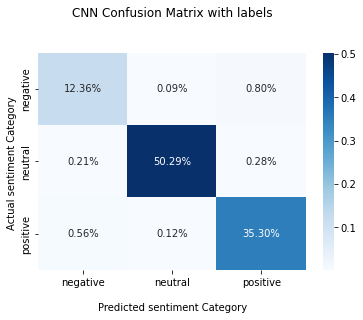

In [ ]:
#cnn_test
cf_matrix2 = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(cnn_val_t).argmax(axis=1))
ax2 = sns.heatmap(cf_matrix2/np.sum(cf_matrix2), annot=True,
            fmt='.2%', cmap='Blues')
ax2.set_title('CNN Confusion Matrix with labels\n\n');
ax2.set_xlabel('\nPredicted sentiment Category')
ax2.set_ylabel('Actual sentiment Category ');
ax2.xaxis.set_ticklabels(['negative','neutral', 'positive'])
ax2.yaxis.set_ticklabels(['negative','neutral', 'positive'])
plt.show()

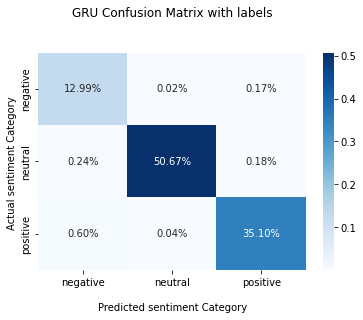

In [ ]:
#gru
cf_matrix3 = confusion_matrix(np.asarray(Y).argmax(axis=1), np.asarray(gru_vals).argmax(axis=1))
ax3 = sns.heatmap(cf_matrix3/np.sum(cf_matrix3), annot=True,
            fmt='.2%', cmap='Blues')
ax3.set_title('GRU Confusion Matrix with labels\n\n');
ax3.set_xlabel('\nPredicted sentiment Category')
ax3.set_ylabel('Actual sentiment Category ');
ax3.xaxis.set_ticklabels(['negative','neutral', 'positive'])
ax3.yaxis.set_ticklabels(['negative','neutral', 'positive'])
plt.show()

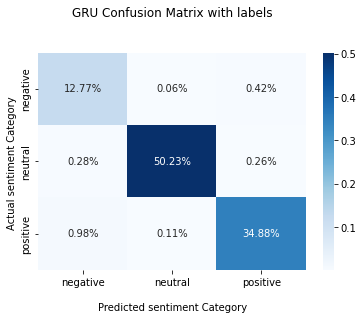

In [ ]:
#gru_test
cf_matrix3 = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(gru_val_t).argmax(axis=1))
ax3 = sns.heatmap(cf_matrix3/np.sum(cf_matrix3), annot=True,
            fmt='.2%', cmap='Blues')
ax3.set_title('GRU Confusion Matrix with labels\n\n');
ax3.set_xlabel('\nPredicted sentiment Category')
ax3.set_ylabel('Actual sentiment Category ');
ax3.xaxis.set_ticklabels(['negative','neutral', 'positive'])
ax3.yaxis.set_ticklabels(['negative','neutral', 'positive'])
plt.show()

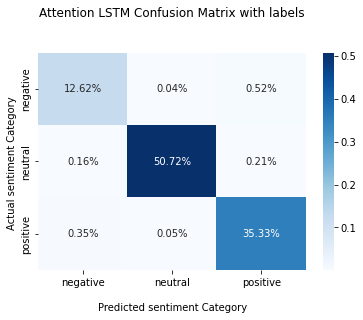

In [ ]:
#attention
cf_matrix4 = confusion_matrix(np.asarray(Y).argmax(axis=1), np.asarray(attlstm_vals).argmax(axis=1))
ax4 = sns.heatmap(cf_matrix4/np.sum(cf_matrix4), annot=True,
            fmt='.2%', cmap='Blues')
ax4.set_title('Attention LSTM Confusion Matrix with labels\n\n');
ax4.set_xlabel('\nPredicted sentiment Category')
ax4.set_ylabel('Actual sentiment Category ');
ax4.xaxis.set_ticklabels(['negative','neutral', 'positive'])
ax4.yaxis.set_ticklabels(['negative','neutral', 'positive'])
plt.show()

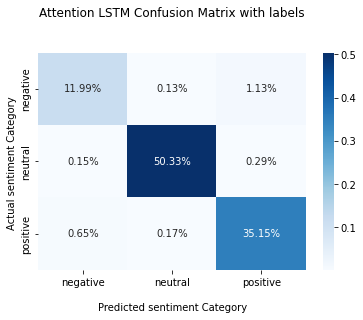

In [ ]:
#attention_test
cf_matrix4 = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(att_val_t).argmax(axis=1))
ax4 = sns.heatmap(cf_matrix4/np.sum(cf_matrix4), annot=True,
            fmt='.2%', cmap='Blues')
ax4.set_title('Attention LSTM Confusion Matrix with labels\n\n');
ax4.set_xlabel('\nPredicted sentiment Category')
ax4.set_ylabel('Actual sentiment Category ');
ax4.xaxis.set_ticklabels(['negative','neutral', 'positive'])
ax4.yaxis.set_ticklabels(['negative','neutral', 'positive'])
plt.show()

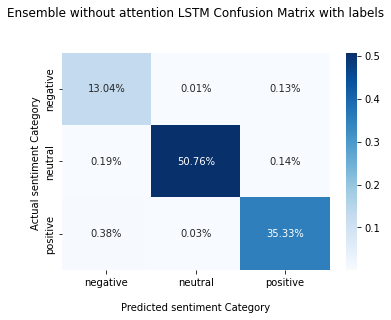

In [ ]:
#ensemble without attention
cf_matrix5 = confusion_matrix(np.asarray(Y).argmax(axis=1), np.asarray(ensb1_vals).argmax(axis=1))
ax5 = sns.heatmap(cf_matrix5/np.sum(cf_matrix5), annot=True,
            fmt='.2%', cmap='Blues')
ax5.set_title('Ensemble without attention LSTM Confusion Matrix with labels\n\n');
ax5.set_xlabel('\nPredicted sentiment Category')
ax5.set_ylabel('Actual sentiment Category ');
ax5.xaxis.set_ticklabels(['negative','neutral', 'positive'])
ax5.yaxis.set_ticklabels(['negative','neutral', 'positive'])
plt.show()

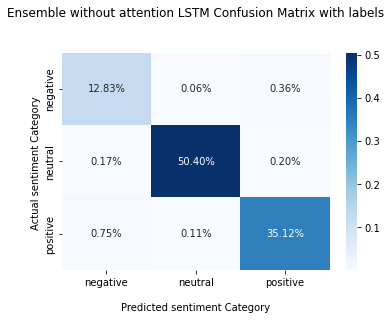

In [ ]:
#ensemble without attention_test
cf_matrix5 = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(pred_final).argmax(axis=1))
ax5 = sns.heatmap(cf_matrix5/np.sum(cf_matrix5), annot=True,
            fmt='.2%', cmap='Blues')
ax5.set_title('Ensemble without attention LSTM Confusion Matrix with labels\n\n');
ax5.set_xlabel('\nPredicted sentiment Category')
ax5.set_ylabel('Actual sentiment Category ');
ax5.xaxis.set_ticklabels(['negative','neutral', 'positive'])
ax5.yaxis.set_ticklabels(['negative','neutral', 'positive'])
plt.show()

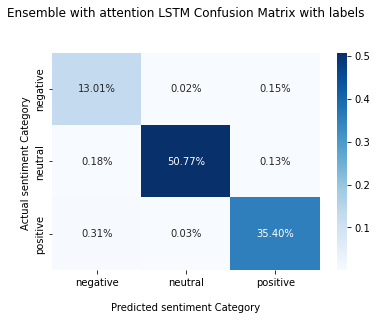

In [ ]:
#ensemble with attention
cf_matrix6 = confusion_matrix(np.asarray(Y).argmax(axis=1), np.asarray(ensb2_vals).argmax(axis=1))
ax6 = sns.heatmap(cf_matrix6/np.sum(cf_matrix6), annot=True,
            fmt='.2%', cmap='Blues')
ax6.set_title('Ensemble with attention LSTM Confusion Matrix with labels\n\n');
ax6.set_xlabel('\nPredicted sentiment Category')
ax6.set_ylabel('Actual sentiment Category ');
ax6.xaxis.set_ticklabels(['negative','neutral', 'positive'])
ax6.yaxis.set_ticklabels(['negative','neutral', 'positive'])
plt.show()

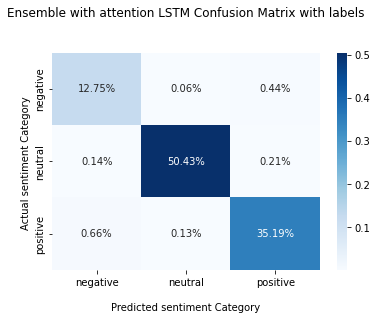

In [ ]:
#ensemble with attention_test
cf_matrix6 = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(pred_final2).argmax(axis=1))
ax6 = sns.heatmap(cf_matrix6/np.sum(cf_matrix6), annot=True,
            fmt='.2%', cmap='Blues')
ax6.set_title('Ensemble with attention LSTM Confusion Matrix with labels\n\n');
ax6.set_xlabel('\nPredicted sentiment Category')
ax6.set_ylabel('Actual sentiment Category ');
ax6.xaxis.set_ticklabels(['negative','neutral', 'positive'])
ax6.yaxis.set_ticklabels(['negative','neutral', 'positive'])
plt.show()

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
#lstm scores
print('LSTM Precision: %.3f' % precision_score(Y, lstm_vals,average='micro'))
print('LSTM Recall: %.3f' % recall_score(Y, lstm_vals,average='micro'))
print('LSTM F1 Score: %.3f' % f1_score(Y, lstm_vals,average='micro'))
print('LSTM test Precision: %.3f' % precision_score(y_test, lstm_val_t,average='micro'))
print('LSTM test Recall: %.3f' % recall_score(y_test, lstm_val_t,average='micro'))
print('LSTM test F1 Score: %.3f' % f1_score(y_test, lstm_val_t,average='micro'))

LSTM Precision: 0.984
LSTM Recall: 0.984
LSTM F1 Score: 0.984
LSTM test Precision: 0.975
LSTM test Recall: 0.975
LSTM test F1 Score: 0.975


In [ ]:
#cnn scores
print('CNN Precision: %.3f' % precision_score(Y, cnn_vals,average='micro'))
print('CNN Recall: %.3f' % recall_score(Y, cnn_vals,average='micro'))
print('CNN F1 Score: %.3f' % f1_score(Y, cnn_vals,average='micro'))
print('CNN test Precision: %.3f' % precision_score(y_test, cnn_val_t,average='micro'))
print('CNN test Recall: %.3f' % recall_score(y_test, cnn_val_t,average='micro'))
print('CNN test F1 Score: %.3f' % f1_score(y_test, cnn_val_t,average='micro'))

CNN Precision: 0.989
CNN Recall: 0.989
CNN F1 Score: 0.989
CNN test Precision: 0.979
CNN test Recall: 0.979
CNN test F1 Score: 0.979


In [ ]:
#gru scores
print('GRU Precision: %.3f' % precision_score(Y, gru_vals,average='micro'))
print('GRU Recall: %.3f' % recall_score(Y, gru_vals,average='micro'))
print('GRU F1 Score: %.3f' % f1_score(Y, gru_vals,average='micro'))
print('GRU test Precision: %.3f' % precision_score(y_test, gru_val_t,average='micro'))
print('GRU test Recall: %.3f' % recall_score(y_test, gru_val_t,average='micro'))
print('GRU test F1 Score: %.3f' % f1_score(y_test, gru_val_t,average='micro'))

GRU Precision: 0.988
GRU Recall: 0.988
GRU F1 Score: 0.988
GRU test Precision: 0.979
GRU test Recall: 0.979
GRU test F1 Score: 0.979


In [ ]:
#attention lstm scores
print('attention lstm Precision: %.3f' % precision_score(Y, attlstm_vals,average='micro'))
print('attention lstm Recall: %.3f' % recall_score(Y, attlstm_vals,average='micro'))
print('attention lstm F1 Score: %.3f' % f1_score(Y, attlstm_vals,average='micro'))
print('attention lstm test Precision: %.3f' % precision_score(y_test, att_val_t,average='micro'))
print('attention lstm test Recall: %.3f' % recall_score(y_test, att_val_t,average='micro'))
print('attention lstm test F1 Score: %.3f' % f1_score(y_test, att_val_t,average='micro'))

attention lstm Precision: 0.987
attention lstm Recall: 0.987
attention lstm F1 Score: 0.987
attention lstm test Precision: 0.975
attention lstm test Recall: 0.975
attention lstm test F1 Score: 0.975


In [ ]:
#Ensemble without attention lstm scores
print('Ensemble without attention lstm lstm Precision: %.3f' % precision_score(Y, ensb1_vals,average='micro'))
print('Ensemble without attention lstm lstm Recall: %.3f' % recall_score(Y, ensb1_vals,average='micro'))
print('Ensemble without attention lstm lstm F1 Score: %.3f' % f1_score(Y, ensb1_vals,average='micro'))
print('Ensemble without attention lstm lstm test Precision: %.3f' % precision_score(y_test, pred_final,average='micro'))
print('Ensemble without attention lstm lstm test Recall: %.3f' % recall_score(y_test, pred_final,average='micro'))
print('Ensemble without attention lstm lstm test F1 Score: %.3f' % f1_score(y_test, pred_final,average='micro'))

Ensemble without attention lstm lstm Precision: 0.991
Ensemble without attention lstm lstm Recall: 0.991
Ensemble without attention lstm lstm F1 Score: 0.991
Ensemble without attention lstm lstm test Precision: 0.984
Ensemble without attention lstm lstm test Recall: 0.984
Ensemble without attention lstm lstm test F1 Score: 0.984


In [ ]:
#Ensemble with attention lstm scores
print('Ensemble without attention lstm lstm Precision: %.3f' % precision_score(Y, ensb2_vals,average='micro'))
print('Ensemble without attention lstm lstm Recall: %.3f' % recall_score(Y, ensb2_vals,average='micro'))
print('Ensemble without attention lstm lstm F1 Score: %.3f' % f1_score(Y, ensb2_vals,average='micro'))
print('Ensemble without attention lstm lstm test Precision: %.3f' % precision_score(y_test, pred_final2,average='micro'))
print('Ensemble without attention lstm lstm test Recall: %.3f' % recall_score(y_test, pred_final2,average='micro'))
print('Ensemble without attention lstm lstm test F1 Score: %.3f' % f1_score(y_test, pred_final2,average='micro'))

Ensemble without attention lstm lstm Precision: 0.992
Ensemble without attention lstm lstm Recall: 0.992
Ensemble without attention lstm lstm F1 Score: 0.992
Ensemble without attention lstm lstm test Precision: 0.984
Ensemble without attention lstm lstm test Recall: 0.984
Ensemble without attention lstm lstm test F1 Score: 0.984


In [ ]:
t=140372
a=[
   [12.75,0.06,0.44],
   [0.14,50.43,0.21],
   [0.66,0.13,35.19]
    ]
p_neg=a[0][0]*t/(a[0][0]*t+a[0][1]*t+a[0][2]*t)
p_neu=a[1][1]*t/(a[1][0]*t+a[1][1]*t+a[1][2]*t)
p_pos=a[2][2]*t/(a[2][0]*t+a[2][1]*t+a[2][2]*t)

r_neg=a[0][0]*t/(a[0][0]*t+a[1][0]*t+a[2][0]*t)
r_neu=a[1][1]*t/(a[0][1]*t+a[1][1]*t+a[2][1]*t)
r_pos=a[2][2]*t/(a[0][2]*t+a[1][2]*t+a[2][2]*t)

f1_neg=(2*p_neg*r_neg)/(p_neg+r_neg)
f1_neu=(2*p_neu*r_neu)/(p_neu+r_neu)
f1_pos=(2*p_pos*r_pos)/(p_pos+r_pos)

print("--- Negative ---")
print("precision: ",p_neg)
print("recall: ",r_neg)
print("f1 score: ",f1_neg)
print("--- Neutral ---")
print("precision: ",p_neu)
print("recall: ",r_neu)
print("f1 score: ",f1_neu)
print("--- Positive ---")
print("precision: ",p_pos)
print("recall: ",r_pos)
print("f1 score: ",f1_pos)